## **Model predicting Urban Heat Island**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
uhi = pd.read_csv(r"C:\Users\levie\OneDrive\Desktop\Year 5\project\dataset\UHI_training_samples_with_coords.csv")

In [17]:
uhi.head()

,system:index,EMM,FV,LST,Map,NDVI,class,latitude,longitude,suhi,.geo
0,1_1_1_1_1_1_1_1_1_2_7_0,0.988258,0.564607,30.783192,50,0.191956,10,-4.067078,39.662461,1.780245,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1_1_1_1_1_1_1_1_1_2_21_0,0.987213,0.303351,31.487080,50,0.101995,10,-4.038242,39.659766,2.484133,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,1_1_1_1_1_1_1_1_1_2_27_0,0.987232,0.308082,31.362094,50,0.103624,10,-4.036894,39.654107,2.359147,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,1_1_1_1_1_1_1_1_1_2_32_0,0.987747,0.436773,30.672953,50,0.147938,10,-4.049560,39.665156,1.670006,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,1_1_1_1_1_1_1_1_1_2_41_0,0.989417,0.854355,28.460604,50,0.291729,10,-4.076779,39.671624,-0.542343,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [18]:
uhi.isnull().sum()

system:index    0
EMM             0
FV              0
LST             0
Map             0
NDVI            0
class           0
latitude        0
longitude       0
suhi            0
.geo            0
dtype: int64

In [19]:
uhi.dtypes

system:index     object
EMM             float64
FV              float64
LST             float64
Map               int64
NDVI            float64
class             int64
latitude        float64
longitude       float64
suhi            float64
.geo             object
dtype: object

In [22]:
uhi = uhi.drop(['system:index','Map','.geo','latitude','longitude'],axis = 1)

In [23]:
#Training features for SUHI
independent_features = uhi.drop(['suhi'],axis=1)
dependent_features = uhi['suhi']

#Training features for LULC
features = uhi.drop(['class'],axis=1)
targets = uhi['class']
print(independent_features.shape)

(1540, 5)


We use RandomForestClasify to classify UHI hotspot areas<br>
We use RandomForestRegressor to predict UHI


In [24]:
#Splitting the dataets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independent_features,dependent_features,test_size=0.3,random_state=100)
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(features,targets,test_size=0.3,random_state=100)

In [25]:
# Standardize the values for the regressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

#Standardize values of the clasifier
X_train_scaled1 = scale.fit_transform(X_train_class)
X_test_scaled1 = scale.fit_transform(X_test_class)

In [26]:
#Fitting the model for training
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [27]:
#Random forest regressor-UHI prediction
rfr.fit(X_train_scaled,y_train)
y_pred = rfr.predict(X_test_scaled)

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Evaluating model performance
def model_perform (y_p,y_t):
    mae = mean_absolute_error(y_p,y_t)
    mse = mean_squared_error(y_p,y_t)
    r2 = r2_score(y_p,y_t)
    print(f"The mean absolute error is:{mae:.3f}")
    print(f"The mean squared error is:{mse:.3f}")
    print(f"R2:{r2:.3f}")
model_eval = model_perform(y_pred,y_test)
print(model_eval)

The mean absolute error is:0.023
The mean squared error is:0.001
R2:0.999
None


### Saving the model


In [41]:
import pickle
filename = "UHI_model.sav"
pickle.dump(rfr, open(filename, 'wb'))

### Using random forest classifier to classify UHI

In [30]:
uhi_data = uhi
uhi_data.head(2)

,EMM,FV,LST,NDVI,class,suhi
0,0.988258,0.564607,30.783192,0.191956,10,1.780245
1,0.987213,0.303351,31.487080,0.101995,10,2.484133


In [31]:
# Define risk categories based on LST
def classify_risk(lst):
    if lst > 35:
        return "High Risk"
    elif 30 <= lst <= 35:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Apply classification function
uhi_data["Risk_Level"] = uhi_data["LST"].apply(classify_risk)

In [32]:
# Encode risk levels as numerical labels
risk_mapping = {"Low Risk": 0, "Moderate Risk": 1, "High Risk": 2}
uhi_data["Risk_Label"] = uhi_data["Risk_Level"].map(risk_mapping)

In [ ]:
# Select features and target variable
features = ["NDVI", "EMM", "class", "suhi","FV"]  # Modify with available features
X_1 = uhi_data[features]
y_1 = uhi_data["Risk_Label"]

In [34]:
#Training dataset
from sklearn.model_selection import train_test_split
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(X_1,y_1,test_size=0.2,random_state=42)

In [35]:
# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [36]:
# Predict on test data
y_pred_class = clf.predict(X_test_class)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
# Evaluate model performance
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test_class, y_pred_class))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00       251

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



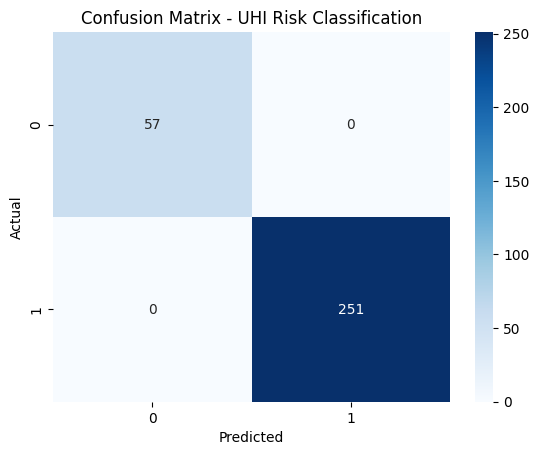

In [39]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - UHI Risk Classification")
plt.show()

### Saving the model

In [40]:
import pickle
filename = "UHI_classify.sav"
pickle.dump(clf, open(filename, 'wb'))